# Regularización

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, SGDRegressor, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

![0 fWnxPH8-HEUCetPz.png](<attachment:0 fWnxPH8-HEUCetPz.png>)
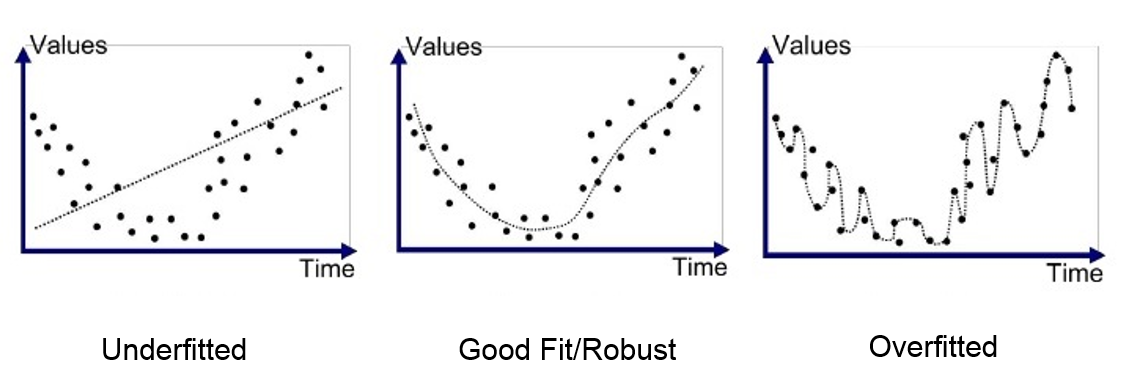

Una buena forma de reducir el sobreajuste (overfitting) es regularizar el modelo (es decir, restringirlo): cuantos menos grados de libertad tenga, más difícil será que sobreajuste los datos. 

Una forma sencilla de regularizar un modelo polinómico es reducir el número de grados polinómicos.

Para un modelo lineal, la regularización se consigue normalmente restringiendo los pesos del modelo. 

Ahora veremos la regresión de Ridge, la regresión de Lasso y la regresión de ElasticNet, que implementan tres formas diferentes de restringir los pesos.

# Nota

Las matemáticas detrás de la regularización puede ser muy complicada: lo importante es entender por qué necesitamos regularizar y la intuición detrás de cada método, pero no hay que saber el cálculo matemático exacto

## Regresión Ridge

La regresión Ridge (también llamada regularización de Tikhonov) es una versión regularizada de la regresión lineal: un término de regularización igual a $ \frac{α}{m} \sum_{i=1}^{n} θ_{i}^2 $ se añade al MSE. Esto obliga al algoritmo de aprendizaje a no solo ajustarse a los datos, sino también a **mantener los pesos del modelo lo más pequeños posible**. Ten en cuenta que el término de regularización solo debe añadirse a la función de costo durante el entrenamiento. Una vez entrenado el modelo, quieres usar el MSE sin regularizar (o el RMSE) para evaluar el rendimiento del modelo.

El hiperparámetro α controla cuánto quieres regularizar el modelo. Si α = 0, entonces la regresión Ridge es solo regresión lineal. Si α es muy grande, entonces todos los pesos terminan muy cerca de cero y el resultado es una línea plana que pasa por la media de los datos.

Función de costo de la regresión Ridge
$ J(θ) = MSE(θ) + \frac{α}{m} \sum_{i=1}^{n} θ_{i}^2 $

Nota que el término de sesgo $ θ_0 $ no está regularizado (la suma comienza en i = 1, no en 0). Si definimos $ w $ como el vector de pesos de las características (θ₁ a θ_n), entonces el término de regularización es igual a $ \frac{α(‖w‖_2)^2}{m} $, donde $ ‖w‖_2 $ representa la norma ℓ_2 del vector de pesos.

Para el descenso de gradiente por lotes, solo añade $ \frac{2αw}{m} $ a la parte del vector gradiente del MSE que corresponde a los pesos de las características, sin añadir nada al gradiente del término de sesgo.


In [34]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

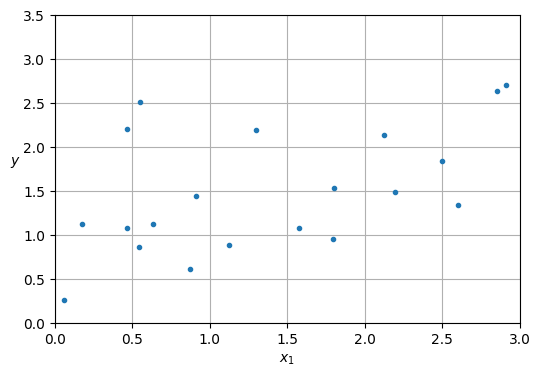

In [35]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [36]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

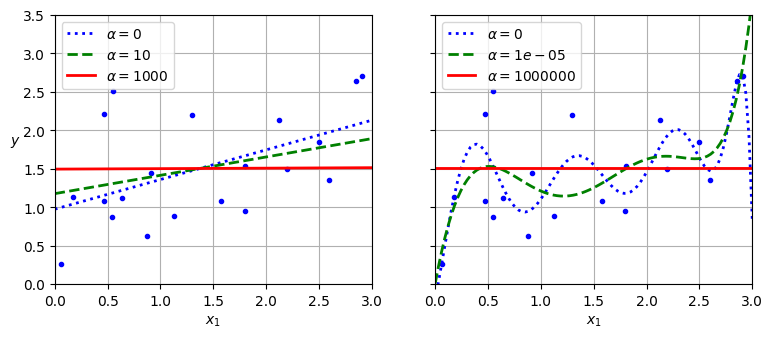

In [37]:

def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 1000), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1_000_000), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
# save_fig("ridge_regression_plot")
plt.show()

Con α = 0 es la regresión lineal clásica, pero a medida que crece se vuelve una recta horizontal que coincide con la media de la $y$

In [38]:
model = Ridge(0)
model.fit(X, y)
model.coef_

array([[0.3852145]])

In [39]:
model = Ridge(10)
model.fit(X, y)
model.coef_

array([[0.23812306]])

In [40]:
model = Ridge(1000)
model.fit(X, y)
model.coef_

array([[0.0061368]])

In [41]:
model = Ridge(0)
model_pipe = make_pipeline(
        PolynomialFeatures(degree=10, include_bias=False),
        StandardScaler(),
        model)
model_pipe.fit(X, y)
model.coef_

array([[ 6.48806377e+00,  2.44055612e+01, -2.61225464e+02,
        -1.98284346e+03,  2.14221067e+04, -7.60464770e+04,
         1.38670393e+05, -1.39847743e+05,  7.42373972e+04,
        -1.62219623e+04]])

In [42]:
model = Ridge(10)
model_pipe = make_pipeline(
        PolynomialFeatures(degree=10, include_bias=False),
        StandardScaler(),
        model)
model_pipe.fit(X, y)
model.coef_

array([[0.05248709, 0.02264363, 0.02248443, 0.02679858, 0.03177603,
        0.03691942, 0.04211906, 0.04729072, 0.05235371, 0.05723744]])

In [43]:
model = Ridge(1000)
model_pipe = make_pipeline(
        PolynomialFeatures(degree=10, include_bias=False),
        StandardScaler(),
        model)
model_pipe.fit(X, y)
model.coef_

array([[0.00585582, 0.00610261, 0.00635557, 0.00650968, 0.00659413,
        0.00663919, 0.00666248, 0.00667345, 0.00667715, 0.00667637]])

## Regresión Lasso

La regresión por mínimo absoluto y operador de selección (normalmente llamada simplemente regresión lasso) es otra versión regularizada de la regresión lineal: al igual que la regresión ridge, añade un término de regularización a la función de coste, pero utiliza la norma $ℓ1$ del vector de pesos en lugar del cuadrado de la norma $ℓ2$. 

Tenga en cuenta que la norma $ℓ1$ se multiplica por $2α$, mientras que la norma $ℓ2$ se multiplicó por $α / m$ en la regresión de ridge. Estos factores fueron elegidos para asegurar que el valor óptimo de $α$ es independiente del tamaño del conjunto de entrenamiento: diferentes normas conducen a diferentes factores.


Mientras que Ridge tiende a **mantener los pesos del modelo lo más pequeños posible**, Lasso va **eliminando aquellos predictores con menos impacto**

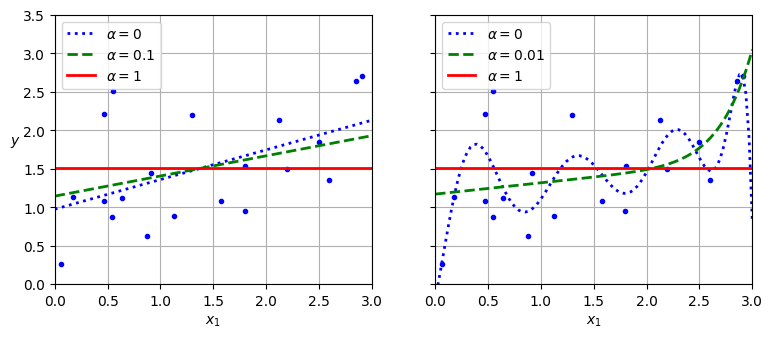

In [44]:
from sklearn.linear_model import Lasso
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
# save_fig("lasso_regression_plot")
plt.show()

In [45]:
model = Lasso(0)
model.fit(X, y)
model.coef_

c:\Users\jonat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\jonat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\jonat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.446e+00, tolerance: 9.295e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers i

array([0.3852145])

In [46]:
model = Lasso(0.1)
model.fit(X, y)
model.coef_

array([0.26167212])

In [47]:
model = Lasso(1)
model.fit(X, y)
model.coef_

array([0.])

In [48]:
model = Lasso(0)
model_pipe = make_pipeline(
        PolynomialFeatures(degree=10, include_bias=False),
        StandardScaler(),
        model)
model_pipe.fit(X, y)
model.coef_

c:\Users\jonat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\jonat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\jonat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers i

array([ 1.17874780e+00, -2.71604828e+00,  1.88203196e+00,  4.73570759e-01,
       -3.35653044e-01, -4.49644855e-01, -2.64347184e-01, -3.94330591e-04,
        2.48958583e-01,  4.50299975e-01])

In [49]:
model = Lasso(0.1)
model_pipe = make_pipeline(
        PolynomialFeatures(degree=10, include_bias=False),
        StandardScaler(),
        model)
model_pipe.fit(X, y)
model.coef_

array([0.07951295, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.23837585])

In [50]:
model = Lasso(1)
model_pipe = make_pipeline(
        PolynomialFeatures(degree=10, include_bias=False),
        StandardScaler(),
        model)
model_pipe.fit(X, y)
model.coef_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Elastic Net

La regresión Elastic Net es un punto intermedio entre la regresión Ridge y la regresión Lasso. El término de regularización es una suma ponderada de los términos de regularización tanto de Ridge como de Lasso, y puedes controlar la proporción de la mezcla $ r $. Cuando $ r = 0 $, Elastic Net es equivalente a la regresión Ridge, y cuando $ r = 1 $, es equivalente a la regresión Lasso.

Función de costo de Elastic Net
$$J(\theta) = \text{MSE}(\theta) + r(2\alpha\sum_{i=1}^{n} |\theta_i| )+ (1 - r)(\frac{\alpha}{m}\sum_{i=1}^{n} \theta_i^2)$$

Entonces, ¿cuándo deberías usar la regresión Elastic Net, o Ridge, Lasso o la regresión lineal simple (es decir, sin ninguna regularización)? Casi siempre es preferible tener al menos un poco de regularización, así que generalmente deberías evitar la regresión lineal simple. Ridge es una buena opción por defecto, pero si sospechas que solo unas pocas características son útiles, deberías preferir Lasso o Elastic Net porque tienden a reducir los pesos de las características inútiles a cero, como se discutió anteriormente. En general, se prefiere Elastic Net sobre Lasso porque Lasso puede comportarse de manera errática cuando el número de características es mayor que el número de instancias de entrenamiento o cuando varias características están fuertemente correlacionadas.

Aquí hay un breve ejemplo que usa ElasticNet de Scikit-Learn (l1_ratio corresponde a la proporción de la mezcla $ r $):

In [51]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [73]:
model = Ridge(10)
model_pipe = make_pipeline(
        PolynomialFeatures(degree=10, include_bias=False),
        StandardScaler(),
        model)
model_pipe.fit(X, y)
model.coef_

array([[0.05248709, 0.02264363, 0.02248443, 0.02679858, 0.03177603,
        0.03691942, 0.04211906, 0.04729072, 0.05235371, 0.05723744]])

In [75]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=10, l1_ratio = 0)
model_pipe = make_pipeline(
        PolynomialFeatures(degree=10, include_bias=False),
        StandardScaler(),
        elastic_net)
model_pipe.fit(X, y)
elastic_net.coef_

c:\Users\jonat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.883e+00, tolerance: 9.295e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([0.01818564, 0.01831225, 0.01908606, 0.01966359, 0.02004715,
       0.02031413, 0.02051417, 0.02067372, 0.02080653, 0.02091982])

In [67]:
model = Ridge(10)
model.fit(X, y)
model.coef_

array([[0.23812306]])

In [54]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=1)
elastic_net.fit(X, y)
elastic_net.coef_

array([0.26167212])

In [55]:
model = Lasso(0.1)
model.fit(X, y)
model.coef_

array([0.26167212])